In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
colors = pd.read_csv('colors.csv')

In [30]:
colors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        135 non-null    int64 
 1   name      135 non-null    object
 2   rgb       135 non-null    object
 3   is_trans  135 non-null    object
dtypes: int64(1), object(3)
memory usage: 4.3+ KB


In [31]:
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [32]:
colors.name.nunique()

135

In [33]:
colors.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [34]:
colors.is_trans.value_counts()

f    107
t     28
Name: is_trans, dtype: int64

In [35]:
colors.is_trans.describe()

count     135
unique      2
top         f
freq      107
Name: is_trans, dtype: object

In [36]:
sets = pd.read_csv('sets.csv')

In [37]:
sets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15710 entries, 0 to 15709
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   set_num    15710 non-null  object
 1   name       15710 non-null  object
 2   year       15710 non-null  int64 
 3   theme_id   15710 non-null  int64 
 4   num_parts  15710 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 613.8+ KB


In [38]:
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [39]:
sets.year.min()

1949

In [40]:
sets[sets.year == sets.year.min()]

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


In [41]:
sets[sets.year == sets.year.min()].count()

set_num      5
name         5
year         5
theme_id     5
num_parts    5
dtype: int64

In [42]:
sets[['set_num', 'num_parts']].sort_values(by='num_parts', ascending=False).head()

,set_num,num_parts
15004,BIGBOX-1,9987
11183,75192-1,7541
10551,71043-1,6020
295,10256-1,5923
221,10189-1,5922


In [55]:
sets_by_year = sets.groupby('year').count()
sets_by_year['set_num']

year
1949      5
1950      6
1953      4
1954     14
1955     28
       ... 
2017    786
2018    816
2019    840
2020    674
2021      3
Name: set_num, Length: 71, dtype: int64

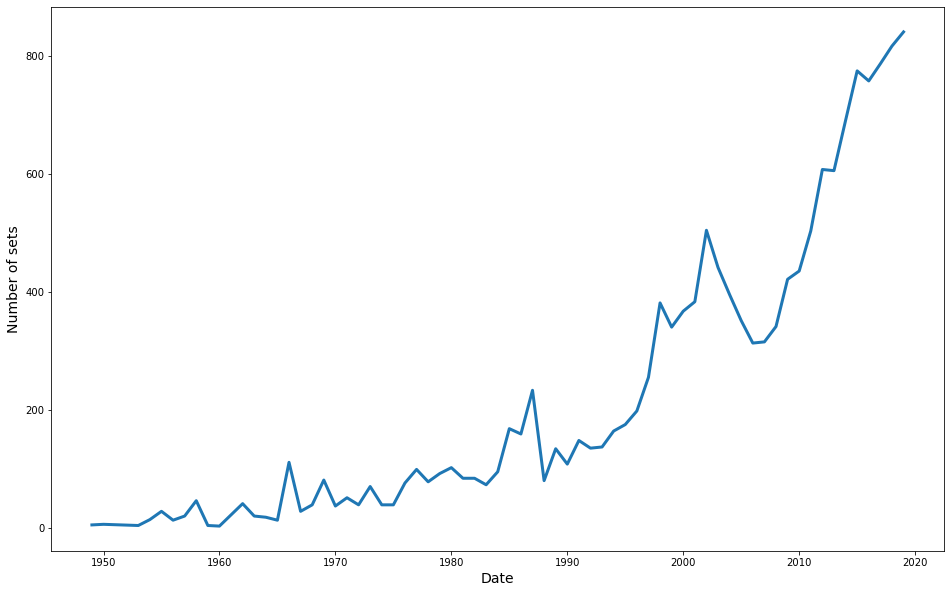

In [61]:
plt.figure(figsize=(16,10))
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of sets', fontsize=14)
plt.plot(sets_by_year.index[:-2], sets_by_year['set_num'][:-2], linewidth=3)

In [62]:
themes_by_year = sets.groupby('year').agg({'theme_id': pd.Series.nunique})

In [64]:
themes_by_year.rename(columns={'theme_id': 'no_themes'}, inplace=True)

In [65]:
themes_by_year

,no_themes
year,
1949,2
1950,1
1953,2
1954,2
1955,4
...,...
2017,89
2018,93
2019,78


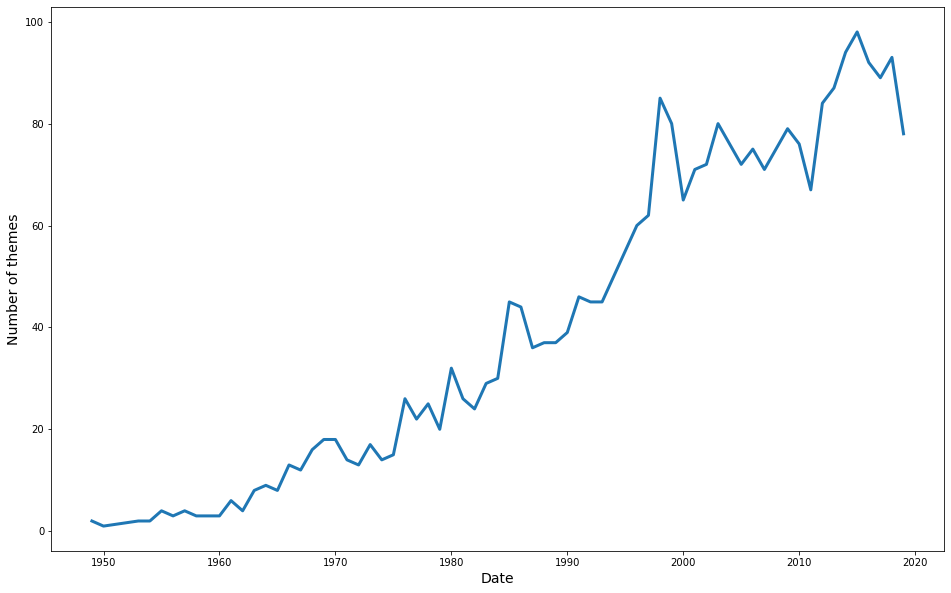

In [67]:
plt.figure(figsize=(16,10))
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of themes', fontsize=14)
plt.plot(themes_by_year.index[:-2], themes_by_year['no_themes'][:-2], linewidth=3)

Text(0, 0.5, 'Number of themes')

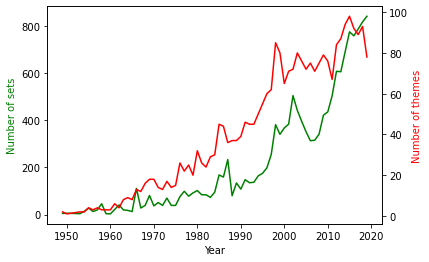

In [68]:
ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() 

ax1.plot(sets_by_year.index[:-2], sets_by_year['set_num'][:-2], color='g')
ax2.plot(themes_by_year.index[:-2], themes_by_year['no_themes'][:-2], color='r')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of sets', color='green')
ax2.set_ylabel('Number of themes', color='red')

In [73]:
parts_per_set = sets.groupby('year').agg({'num_parts': pd.Series.mean})

In [74]:
parts_per_set.rename(columns={'num_parts': 'avg_num_parts'}, inplace=True)

In [75]:
parts_per_set.head()

,avg_num_parts
year,
1949,99.600000
1950,1.000000
1953,13.500000
1954,12.357143
1955,36.607143


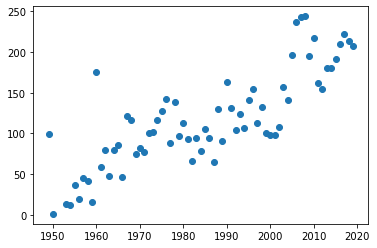

In [77]:
plt.scatter(parts_per_set.index[:-2], parts_per_set['avg_num_parts'][:-2])

<img src="https://i.imgur.com/Sg4lcjx.png">

In [79]:
themes = pd.read_csv('themes.csv')

In [80]:
themes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596 entries, 0 to 595
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         596 non-null    int64  
 1   name       596 non-null    object 
 2   parent_id  464 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 14.1+ KB


In [81]:
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [84]:
star_wars_ids = themes[themes.name == 'Star Wars'].id.values

In [85]:
star_wars_ids

array([ 18, 158, 209, 261], dtype=int64)

In [87]:
sets.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [96]:
for value in star_wars_ids:
    print(f'theme id: {value}')
    print(sets[sets.theme_id == value].count().set_num)

theme id: 18
11
theme id: 158
753
theme id: 209
10
theme id: 261
2


In [97]:
set_theme_count = sets['theme_id'].value_counts()

In [98]:
set_theme_count

158    753
501    656
494    398
435    356
503    329
      ... 
307      1
215      1
361      1
210      1
414      1
Name: theme_id, Length: 571, dtype: int64

In [99]:
set_theme_count = pd.DataFrame({'id': set_theme_count.index, 'set_count': set_theme_count.values})

In [100]:
set_theme_count.head()

,id,set_count
0,158,753
1,501,656
2,494,398
3,435,356
4,503,329


In [101]:
merged_df = pd.merge(set_theme_count, themes, on='id')

In [102]:
merged_df.head()

,id,set_count,name,parent_id
0,158,753,Star Wars,NaN
1,501,656,Gear,NaN
2,494,398,Friends,NaN
3,435,356,Ninjago,NaN
4,503,329,Key Chain,501.0


<BarContainer object of 10 artists>

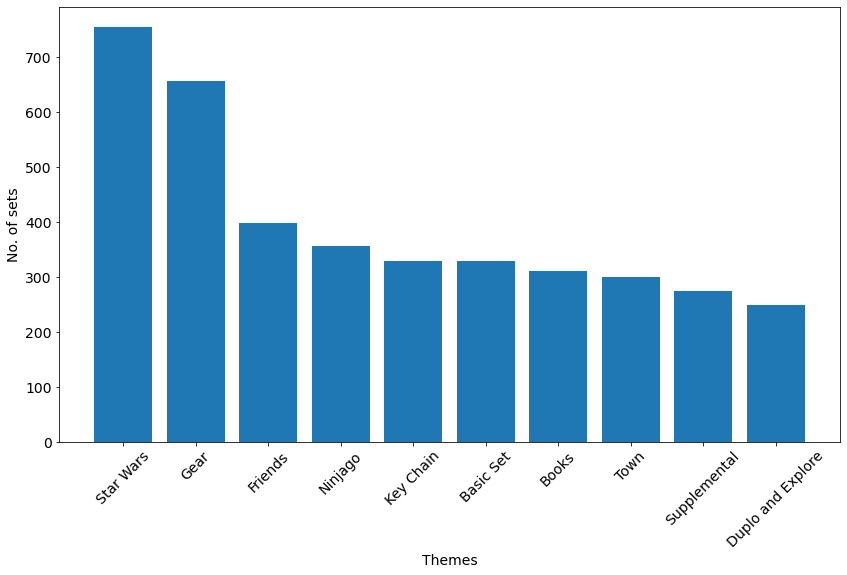

In [104]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('No. of sets', fontsize=14)
plt.xlabel('Themes', fontsize=14)
plt.bar(merged_df.name[:10], merged_df.set_count[:10])